<a href="https://colab.research.google.com/github/VasavSrivastava/MAT421/blob/main/Hw8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Numerical Integration Problem Statement**

Given a function $f(x)$, the goal is to approximate its integral over an interval **[a, b]**. The integral is represented as:

$$
I = \int_a^b f(x)dx
$$

To achieve this, the interval is discretized into a numerical grid $x$, consisting of **n + 1** points with spacing:

$$
h = \frac{b - a}{n}
$$

Each point in the grid is denoted as $x_i$, where:

- $x_0 = a$ (starting point)
- $x_n = b$ (ending point)

Since the count starts at $x_0$, the grid contains **n + 1** points. The function $f(x)$ can be computed at any of these grid points, either explicitly given or implicitly defined as $f(x_i)$.

Each interval **$[x_i, x_{i+1}]$** is referred to as a **subinterval**.

## **Concept of Numerical Integration**
Instead of solving the integral directly, numerical integration methods approximate the **area under the curve** by dividing it into small, manageable subintervals. Different methods use different shapes to approximate these subintervals, such as:
- **Rectangles (Riemann Sum)**
- **Trapezoids (Trapezoidal Rule)**
- **Parabolic Curves (Simpson’s Rule)**

Each method sums the contribution of all subintervals to estimate the total integral.


Trapezoidal Rule Approximation: 1.9998355038874436
Simpson’s Rule Approximation: 2.0000000108245044


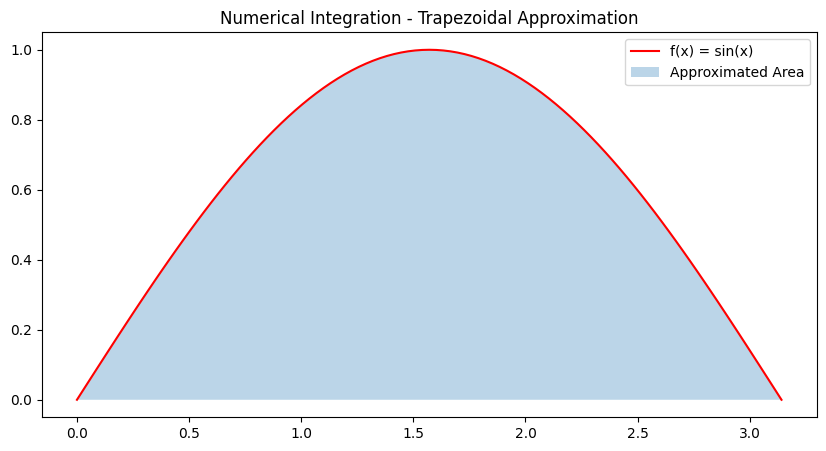

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
from scipy.integrate import simps

# Suppress DeprecationWarnings
warnings.simplefilter("ignore", category=DeprecationWarning)

# Define the function to integrate
def f(x):
    return np.sin(x)

# Integration interval
a, b = 0, np.pi
n = 100  # Number of subintervals
x = np.linspace(a, b, n+1)
y = f(x)

# **Trapezoidal Rule**
def trapezoidal_rule(x, y):
    h = x[1] - x[0]
    return h * (np.sum(y) - 0.5 * (y[0] + y[-1]))

trap_result = trapezoidal_rule(x, y)

# **Simpson’s Rule**
simp_result = simps(y, x)

# Print results
print(f"Trapezoidal Rule Approximation: {trap_result}")
print(f"Simpson’s Rule Approximation: {simp_result}")

# **Plot function with Trapezoidal Approximation**
plt.figure(figsize=(10, 5))
plt.plot(x, y, 'r', label="f(x) = sin(x)")
plt.fill_between(x, y, alpha=0.3, label="Approximated Area")
plt.legend()
plt.title("Numerical Integration - Trapezoidal Approximation")
plt.show()


# **Riemann Integral**

The **Riemann Integral** is an approximation method for evaluating integrals by summing the areas of rectangles over subintervals. The width of each rectangle is given by:

$$ x_{i+1} - x_i = h $$

The height is determined by evaluating the function at either the left endpoint \( x_i \) or the right endpoint \( x_{i+1} \). This leads to the **Riemann Integral approximation**:

$$ \int_{a}^{b} f(x)dx \approx \sum_{i=0}^{n-1} h f(x_i), $$

or

$$ \int_{a}^{b} f(x)dx \approx \sum_{i=1}^{n} h f(x_i), $$

depending on whether the left or right endpoint is chosen.

To analyze accuracy, we express \( f(x) \) using the Taylor series expansion around \( x_i \):

$$ f(x) = f(x_i) + f'(x_i)(x - x_i) + \dots $$

Thus, integrating over a single subinterval:

$$ \int_{x_i}^{x_{i+1}} f(x)dx = \int_{x_i}^{x_{i+1}} \left( f(x_i) + f'(x_i)(x - x_i) + \dots \right) dx $$

Expanding and integrating each term separately:

$$ \int_{x_i}^{x_{i+1}} f(x)dx = h f(x_i) + \frac{h^2}{2} f'(x_i) + O(h^3) $$

which simplifies to:

$$ \int_{x_i}^{x_{i+1}} f(x)dx = h f(x_i) + O(h^2). $$

Since the leading error term is \( O(h^2) \) per subinterval, summing over all subintervals gives a total error of \( O(h) \).



# **Midpoint Rule**

The **Midpoint Rule** improves upon the Riemann Integral by evaluating \( f(x) \) at the midpoint of each subinterval:

$$ y_i = \frac{x_i + x_{i+1}}{2}. $$

Using this, the approximation is:

$$ \int_{a}^{b} f(x)dx \approx \sum_{i=0}^{n-1} h f(y_i). $$

Expanding \( f(x) \) around \( y_i \) using the Taylor series:

$$ f(x) = f(y_i) + f'(y_i)(x - y_i) + \frac{f''(y_i)(x - y_i)^2}{2!} + \dots $$

Integrating over a subinterval:

$$ \int_{x_i}^{x_{i+1}} f(x)dx = \int_{x_i}^{x_{i+1}} \left( f(y_i) + f'(y_i)(x - y_i) + \frac{f''(y_i)(x - y_i)^2}{2!} + \dots \right) dx $$

Since \( x_i \) and \( x_{i+1} \) are symmetric around \( y_i \), the integral of the odd terms cancels out. The dominant error term is \( O(h^3) \), leading to:

$$ \int_{x_i}^{x_{i+1}} f(x)dx = h f(y_i) + O(h^3). $$

Summing over the entire interval, the total error is \( O(h^2) \), making the Midpoint Rule more accurate than the standard Riemann sum.



Left Riemann Approximation: 1.9835235375094546 Error: 0.01647646249054535
Right Riemann Approximation: 1.9835235375094546 Error: 0.01647646249054535
Midpoint Rule Approximation: 2.0082484079079745 Error: -0.008248407907974542


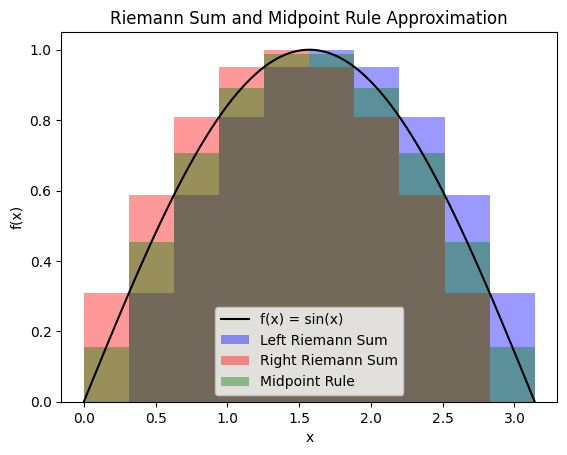

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define function to integrate
def f(x):
    return np.sin(x)

# Integration limits
a = 0
b = np.pi

# Number of subintervals
n = 11  # You can increase n for better accuracy
h = (b - a) / (n - 1)

# Generate points
x = np.linspace(a, b, n)

# Left Riemann Sum
I_riemannL = h * sum(f(x[:-1]))
err_riemannL = 2 - I_riemannL

# Right Riemann Sum
I_riemannR = h * sum(f(x[1:]))
err_riemannR = 2 - I_riemannR

# Midpoint Rule
midpoints = (x[:-1] + x[1:]) / 2
I_mid = h * sum(f(midpoints))
err_mid = 2 - I_mid

# Print results
print("Left Riemann Approximation:", I_riemannL, "Error:", err_riemannL)
print("Right Riemann Approximation:", I_riemannR, "Error:", err_riemannR)
print("Midpoint Rule Approximation:", I_mid, "Error:", err_mid)

# Plotting the function and the rectangles
x_fine = np.linspace(a, b, 1000)
y_fine = f(x_fine)

plt.plot(x_fine, y_fine, label="f(x) = sin(x)", color="black")
plt.bar(x[:-1], f(x[:-1]), width=h, alpha=0.4, align='edge', label="Left Riemann Sum", color="blue")
plt.bar(x[1:], f(x[1:]), width=-h, alpha=0.4, align='edge', label="Right Riemann Sum", color="red")
plt.bar(midpoints, f(midpoints), width=h, alpha=0.4, label="Midpoint Rule", color="green")

plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Riemann Sum and Midpoint Rule Approximation")
plt.legend()
plt.show()


# **Trapezoid Rule**

The **Trapezoid Rule** is an improvement over the Riemann Integral by approximating the area under a curve using trapezoids instead of rectangles. It computes the area of a trapezoid with corners at \( (x_i,0) \), \( (x_{i+1},0) \), \( (x_i,f(x_i)) \), and \( (x_{i+1}, f(x_{i+1})) \). The formula for the area of each trapezoid is:

$$ \frac{h}{2} (f(x_i) + f(x_{i+1})) $$

Thus, the **Trapezoid Rule** approximates the integral as:

$$ \int_{a}^{b} f(x)dx \approx \sum_{i=0}^{n-1} \frac{h}{2} \left( f(x_i) + f(x_{i+1}) \right). $$

Since each function value (except for the endpoints) appears twice in the sum, we can rewrite this as:

$$ \int_{a}^{b} f(x)dx \approx \frac{h}{2} \left( f(x_0) + 2 \sum_{i=1}^{n-1} f(x_i) + f(x_n) \right). $$

# **Accuracy of the Trapezoid Rule**

To analyze its accuracy, we expand \( f(x) \) in a **Taylor series** around the midpoint:

$$ f(x) = f(y_i) + f'(y_i)(x - y_i) + \frac{f''(y_i)(x - y_i)^2}{2!} + \dots $$

where \( y_i \) is the midpoint:

$$ y_i = \frac{x_i + x_{i+1}}{2}. $$

Expanding \( f(x) \) at \( x_i \) and \( x_{i+1} \), we get:

$$ f(x_i) = f(y_i) - \frac{h}{2} f'(y_i) + \frac{h^2}{8} f''(y_i) + \dots $$

$$ f(x_{i+1}) = f(y_i) + \frac{h}{2} f'(y_i) + \frac{h^2}{8} f''(y_i) + \dots $$

Averaging these:

$$ \frac{f(x_i) + f(x_{i+1})}{2} = f(y_i) + O(h^2). $$

Thus, integrating over a subinterval,

$$ \int_{x_i}^{x_{i+1}} f(x)dx = h f(y_i) + O(h^3). $$

Substituting \( f(y_i) \) in terms of \( f(x_i) \) and \( f(x_{i+1}) \),

$$ \int_{x_i}^{x_{i+1}} f(x)dx = h \left( \frac{f(x_i) + f(x_{i+1})}{2} \right) + O(h^3). $$

Summing over all intervals, the **global error** is \( O(h^2) \), making the Trapezoid Rule more accurate than basic Riemann sums.

Trapezoid Rule Approximation: 1.9835235375094546
Error: 0.01647646249054535


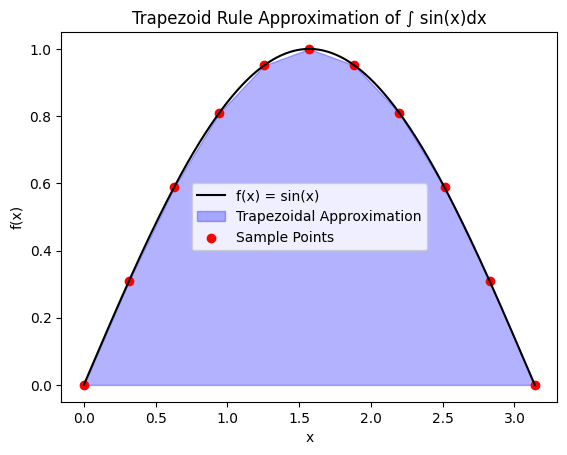

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define function to integrate
def f(x):
    return np.sin(x)

# Integration limits
a = 0
b = np.pi

# Number of subintervals
n = 11  # You can increase n for better accuracy
h = (b - a) / (n - 1)

# Generate points
x = np.linspace(a, b, n)

# Compute Trapezoidal Approximation
I_trapezoid = h * (0.5 * f(x[0]) + sum(f(x[1:-1])) + 0.5 * f(x[-1]))
err_trapezoid = 2 - I_trapezoid

# Print results
print("Trapezoid Rule Approximation:", I_trapezoid)
print("Error:", err_trapezoid)

# Plot function and trapezoids
x_fine = np.linspace(a, b, 1000)
y_fine = f(x_fine)

plt.plot(x_fine, y_fine, label="f(x) = sin(x)", color="black")
plt.fill_between(x, f(x), alpha=0.3, color="blue", label="Trapezoidal Approximation")
plt.scatter(x, f(x), color="red", label="Sample Points")

plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Trapezoid Rule Approximation of ∫ sin(x)dx")
plt.legend()
plt.show()